# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

 2.1 Импорт библиотеки

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2.2 Вывел общую информацию по таблице, таблица  имеет вид строки.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

2.3 Перезапись таблицы для дальнейшей работы с таблицы.

In [4]:
data = pd.read_csv('C:/Users/User/Downloads/проекты/проекты/готовое/3й иследовательский анализ/real_estate_data.csv', sep='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В таблице содержит информацию о сроках продажах квартир по городу Санкт-Петербург и близ лежайшим городам Ленинградской области. В таблице присутствуют пропущенные значения по стобцам 'ceiling_height','floors_total','living_area ' и прочии. Почему есть пропуски разберемся далее.

## Предобработка данных

    3.1 Проверка таблицы на наличие пропущенных значений.

In [6]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Позиции в стобцах по высоте потолков 'ceiling_height' и количеству этажей в доме 'floors_total' имеют пропущенные значения. Значения по высоте потолков заменяю на среднее значение = 2.77 м, значения примерно одинаковые и не имеют большого разброса и потому можно взять среднее значение. Для количества этажей беру медианное значение так как разброс значений достаточно большой и медианное значение равно 9, что подходит.

In [7]:
ceiling_height=data['ceiling_height'].mean()

In [8]:
data['ceiling_height']=data['ceiling_height'].fillna(ceiling_height)

In [9]:
floors_total=data['floors_total'].median()

In [10]:
data['floors_total']=data['floors_total'].fillna(floors_total)

Позиции по стобцам 'is_apartment' и 'balcony' имеют пропуски. Пропуски в графе апартаменты говорит о том что квартира относится к иному типу, здесь значения заменяю на False а далее тип графы поменяю на bool, а с балконами выходит что если имеется пропуск и такое допущено изза его отутствия, пропуски меняю на 0.

In [11]:
data['is_apartment']=data['is_apartment'].fillna(False)

In [12]:
data['balcony']=data['balcony'].fillna(0)

Проспуски в столбце о городе расположения квартиры скорей всего допустили изза повторения места расположения, таких значений не много 49, заменю их на 'Санкт-Петербург', по стобцу налчие парков в ближайшем расположения среднее значение как и медианное выдает примерно 1, по логике с любым домом в раддиусе хотя бы один парк но имеет поэтому меняю пропущенные занчения на 1, а пропущенные значения по стобцу и растоянии до ближайщего парка на среднее значение, пропусков достаточно много и почему они были допущены не совсем понятно.

In [13]:
data['locality_name']=data['locality_name'].fillna('Санкт-Петербург')

Точно так же и с водоемами, в Санкт-Петербурге и Ленинградской области достаточно много водоемов и пустые значения меняю на медианные, и пропуски возникли в следствии не важности а может еще по какой причине.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

    3.2 Изменение типов данных.

In [15]:
data['total_images']= data['total_images'].astype('int8')#замена инт64 на инт8  так как не хранит переменная такого большого числа, хватит и меньшего

In [16]:
data['last_price']= data['last_price'].astype('int32')# аналогично

In [17]:
data['rooms']= data['rooms'].astype('uint8')# замена на unit8 число комнат всегда положительное число

In [18]:
data['ceiling_height']=data['ceiling_height'].astype('float16')# здесь достаточно и float16 для хранения информации

In [19]:
data['floors_total']=data['floors_total'].astype('uint8')# замена на unit8 число этажей всегда положительное число

In [20]:
data['floor']=data['floor'].astype('uint8')# замена на unit8 число этажей всегда положительное число

In [21]:
data['is_apartment']=data['is_apartment'].astype('bool')# апартаменты или да или нет, bool больше подходит

In [22]:
data['balcony']=data['balcony'].astype('uint8')# замена на unit8 число балконов всегда положительное число или 0

In [23]:
data['first_day_exposition']=data['first_day_exposition'].astype('datetime64')# объект поменял на временную переменную для удобства дальнейшей работы

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  uint8         
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  uint8         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  uint8         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [25]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

    3.2 Вывод - Проспуски в столбце о городе расположения квартиры скорей всего допустили изза повторения места расположения, таких значений не много 49, заменю их на 'Санкт-Петербург', по стобцу налчие парков в ближайшем расположения среднее значение как и медианное выдает примерно 1, по логике с любым домом в раддиусе хотя бы один парк но имеет поэтому меняю пропущенные занчения на 1, а пропущенные значения по стобцу и растоянии до ближайщего парка на среднее значение, пропусков достаточно много и почему они были допущены не совсем понятно.
    Оставшиеся столбцы living_area kitchen_area airports_nearest cityCenters_nearest days_exposition пропуски оставлю как есть, так как на 0 не поменяешь, в дальнейшем они искозят информацию на анализе тех или иных параметров. По жилой зоне и площади кухни пропуски странноваты так как самые важные показатели квартиры, и почему они пропущенны пока непомнятно. Столбцы по удаленности от центра и аэропорта так оставлю с пропусками изза возможности исказить информацию и не возможности их заменить на медианное или среднее, так как для каждой локации будет свое значение. Что касается количества дней по продаже квартры их я так же решил оставить как есть изза не возможности заменить их на среднее или медианное или какле либо иное. Пропуски airports_nearest, parks_nearest, ponds_nearest, parks_around3000,ponds_around3000 оставил без изменения.

    3.3 Пооиск Дубликатов

In [26]:
display(data['locality_name'].duplicated().sum())

23335

In [27]:
display(data['locality_name'].value_counts())

Санкт-Петербург                    15770
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [28]:
data['locality_name']=data['locality_name'].replace('Мурино','поселок Мурино')

In [29]:
data['locality_name']=data['locality_name'].replace('посёлок Мурино','поселок Мурино')

In [30]:
data['locality_name']=data['locality_name'].replace('посёлок Шушары','поселок Шушары')

In [31]:
data['locality_name']=data['locality_name'].replace('посёлок Бугры','поселок Бугры')

In [32]:
data['locality_name']=data['locality_name'].replace('посёлок Стрельна','поселок Стрельна')

In [33]:
display(data['locality_name'].value_counts())

Санкт-Петербург                    15770
поселок Мурино                       590
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 361, dtype: int64

3. Вывод - в предобработке данных мной были найдены пропуски значений в столбцах часть которых я заменил на логичные, как мне кажется, значения,locality_name - Санкт_петербург, balcony/is_apartment - 0/False,ceiling_height-среднее значение и тд.. Что касается поиска дубликатов - в названии населенных пунктов была допущена опечатка вместо 'Е' писали 'Ё' и наоборот, после замены неявные дубликаты исчезли.

## Расчёты и добавление результатов в таблицу

    4.1.1 Расчет квадратного метра и добавление дополнительного столбца

In [34]:
data['price']=data['last_price']/data['total_area']

    4.1.2 Добавление в таблицу данных о дате размещения информации и добавление дополнительного столбца

In [35]:
data['time_placement']=pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%d')

    4.1.2 Добавление в таблицу данных о дате(день) размещения информации и добавление дополнительного столбца

In [36]:
data['weekday'] = data['time_placement'].dt.weekday

    4.1.2 Добавление в таблицу данных о дате(месяц) размещения информации

In [37]:
data['monat'] = data['time_placement'].dt.month

    4.1.2 Добавление в таблицу данных о дате(год) размещения информации

In [38]:
data['year'] = data['time_placement'].dt.year

    4.2 Групировка этажей. 

In [39]:
row = data[['floor', 'floors_total']]
def floors_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor ==1:
        return '1-й этаж'
    elif floor == floors_total:
        return 'Последний этаж'
    else:
        return 'Другой'

In [40]:
data['floor_category']=data.apply(floors_category, axis=1)

    4.3 Соотношение площадей

        4.3.1 Отношение жилой площади к полной

In [41]:
data['living_area_ratio']=data['living_area']/data['total_area']

        4.3.1 Отношение площади кухни к полной площади

In [42]:
data['kitchen_area_ratio']=data['kitchen_area']/data['total_area']

   4. Вывод - в 4 пункте сделано групировка этажей, пригодится для дальнейшей работы с таблей, в оснвном людей интересует 
параметры размещения квартиры - первый , последний и что то среднее групировка как раз это и показывает. Дополнительно был произведен расчет квадратного метра по всем населенным пунктам, и добавлены стоблцы по дате размещения по дням, 
месяцам и годам продажи квартир, плюс отношение жилой площади и площади кухни к полной площади - вся информация добавлена в  дополнительные столбцы.


## Исследовательский анализ данных

    5.1 График полной площади квартир по представленным городам.

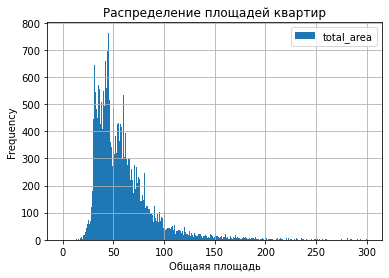

In [43]:
data.plot(y='total_area', kind='hist', bins=300,grid=True, range=(0,300))
plt.xlabel('Общаяя площадь')
plt.title('Распределение площадей квартир')
plt.show()

    5.2  График распределения цены на момент продажи по представленным городам.

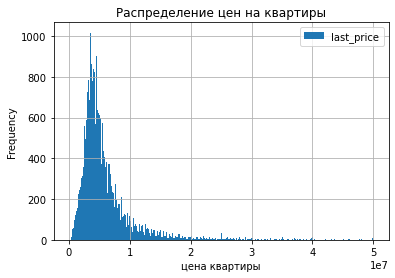

In [44]:
data.plot(y='last_price', kind='hist', bins=300,range=(0,50000000), grid=True)
plt.xlabel('цена квартиры')
plt.title('Распределение цен на квартиры')
plt.show()

График показыывает нормальное распределение с преобладанием квартир со средней ценой до 10000000. значения выше до 2 встречаются уже реже.

    5.3  График распределения количества комнат по представленным городам.

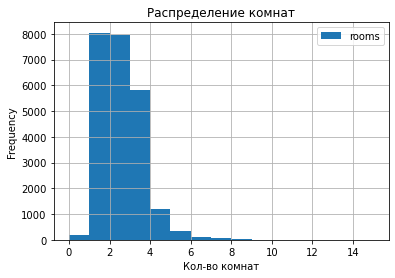

In [45]:
data.plot(y='rooms', kind='hist', grid=True, bins=15, range=(0,15))
plt.xlabel('Кол-во комнат')
plt.title('Распределение комнат')
plt.show()

Здесь видно, что преобладание в квартирах количество комнат в районе от 2 до 4 м до 8000 случаев, от 4 и далее встречаются реже не более 500 случаев в среднем.

    5.4  График распределения высоты потолков по представленным городам.

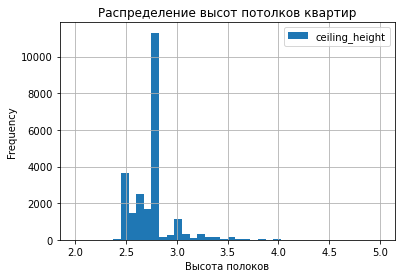

In [46]:
data.plot(y='ceiling_height', kind='hist', grid=True, bins=40, range=(2,5))
plt.xlabel('Высота полоков')
plt.title('Распределение высот потолков квартир')
plt.show()

Количество квартир с высотой полков в районе 2,5 - 2.8 м самое большое из представленных данных порядка 10000 случаев, остальной сегмент небольшой и с 3м состовляет чуть более 1000  остальные и того меньше. 

    5.5 Гистограмма по времени продажи квартиры

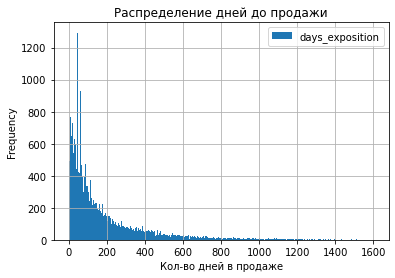

In [47]:
data.plot(y='days_exposition', kind='hist', grid=True, bins=300, range=(0,1600))
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

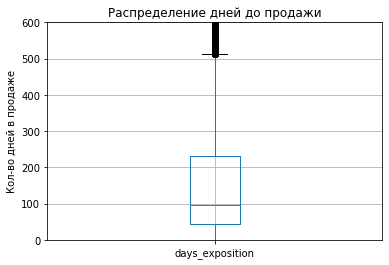

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [50]:
data1=data[['days_exposition']]
plt.ylim(0,600)
data1.boxplot()
plt.ylabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()
data1.describe()

In [51]:
print(data1.median())
print(data1.mean())

days_exposition    95.0
dtype: float64
days_exposition    180.888634
dtype: float64


По гистограмме продажи квартиры видно что есть аномальные данные и std достаточно велико что подтверждает в разбросе данных.boxplot показал нормальное распределние данных от 45 до 232, и видно что среднее значение почти в два раз превышает медианное, это подводи к тому что при большом разбросе нужно будет использовать меианное занчение при оченке показателей.
std>1 == 219, большой разброс, среднее не подойдет, нужна медиана

In [52]:
display(data.sort_values(by='days_exposition', ascending=True).head(10))
data['days_exposition']=data['days_exposition'].round()
print(data['days_exposition'].value_counts().head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price,time_placement,weekday,monat,year,floor_category,living_area_ratio,kitchen_area_ratio
1632,19,4000000,49.90,2019-05-01,2,2.500000,9,25.00,1,False,...,681.0,1.0,80160.320641,2019-05-01,2,5,2019,1-й этаж,0.501002,0.200401
16053,4,4070000,45.10,2019-04-30,2,2.771484,5,22.70,3,False,...,NaN,2.0,90243.902439,2019-04-30,1,4,2019,Другой,0.503326,0.146341
13061,20,6100000,51.40,2019-04-29,2,3.000000,5,31.70,4,False,...,NaN,2.0,118677.042802,2019-04-29,0,4,2019,Другой,0.616732,0.134241
16212,0,7806000,25.00,2019-04-30,1,3.000000,5,NaN,5,False,...,NaN,2.0,312240.000000,2019-04-30,1,4,2019,Последний этаж,NaN,NaN
18680,9,3200000,36.80,2018-03-20,1,2.599609,10,17.80,6,False,...,NaN,3.0,86956.521739,2018-03-20,1,3,2018,Другой,0.483696,0.222826
6909,10,6000000,40.00,2017-09-10,1,2.771484,16,19.50,3,False,...,NaN,3.0,150000.000000,2017-09-10,6,9,2017,Другой,0.487500,0.250000
20448,18,4790000,54.50,2019-02-26,2,2.500000,4,33.30,4,False,...,1001.0,3.0,87889.908257,2019-02-26,1,2,2019,Последний этаж,0.611009,0.148624
9717,0,7740000,59.00,2018-08-31,2,2.771484,6,28.00,4,False,...,NaN,3.0,131186.440678,2018-08-31,4,8,2018,Другой,0.474576,0.271186
11070,2,3134850,33.31,2019-04-22,1,2.599609,12,15.11,12,False,...,NaN,3.0,94111.377965,2019-04-22,0,4,2019,Последний этаж,0.453618,0.285800
2944,16,3690000,37.70,2018-11-18,1,2.550781,10,17.10,8,False,...,919.0,3.0,97877.984085,2018-11-18,6,11,2018,Другой,0.453581,0.230769


45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
8.0     139
20.0    139
44.0    138
11.0    135
18.0    129
13.0    128
10.0    127
15.0    126
28.0    126
22.0    125
Name: days_exposition, dtype: int64


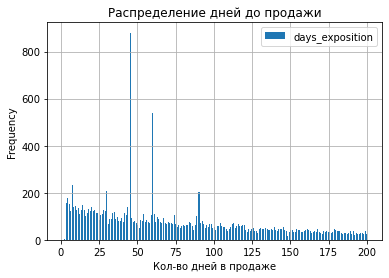

In [54]:
data.plot(y='days_exposition', kind='hist', grid=True, bins=300, range=(1,200))
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

    При построении гистограммы и из таблицы занчений выбиваются занчения по продаже квартиры в 45,60, 7, 30 и 90 дней. Далее избалюсь от них так как они более других выбиваются из нормального распределения, собстенно они и искажают среднее занчение.

In [55]:
exception = data.query('days_exposition!=45 and days_exposition!=60 and days_exposition!=7 and days_exposition!=30 and days_exposition!=90')

In [56]:
print(1-len(exception)/len(data))

0.08709228237478372


Получается процент выкинутых значений 8.7%.было 4,3 исправление сработало)

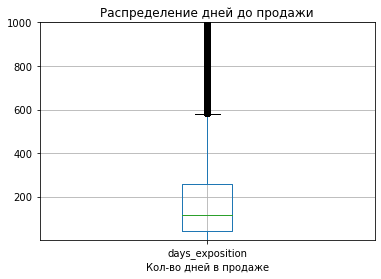

In [57]:
exception1=exception[['days_exposition']]
exception1.boxplot()
plt.ylim(1,1000)
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

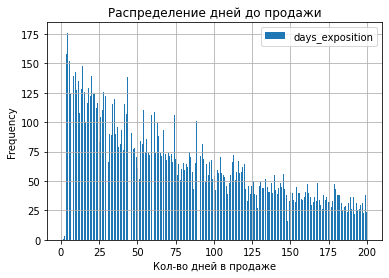

In [58]:
exception.plot(y='days_exposition', kind='hist', grid=True, bins=300, range=(1,200))
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

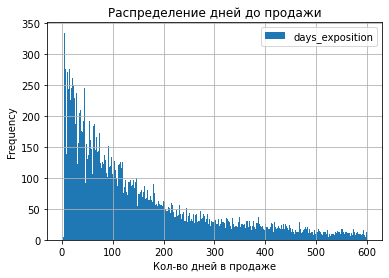

In [59]:
exception.plot(y='days_exposition', kind='hist', grid=True, bins=300, range=(1,600))
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

In [60]:
exception['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

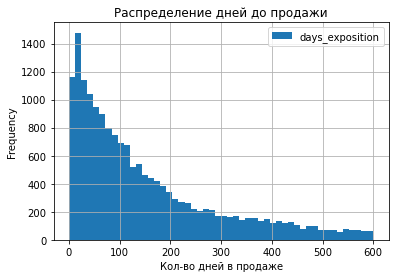

In [61]:
exception.plot(y='days_exposition', kind='hist', grid=True, bins=50, range=(0,600))
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи')
plt.show()

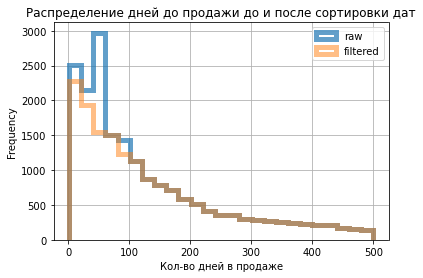

In [62]:
ax = median_data = data.plot(kind='hist',
    y='days_exposition',
    histtype='step',
    range=(1, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw')
exp_medain = exception.plot(kind='hist',
    y='days_exposition',
    histtype='step',
    range=(1, 500),
    bins=25,
    linewidth=5,
    alpha=0.5,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,)
plt.xlabel('Кол-во дней в продаже')
plt.title('Распределение дней до продажи до и после сортировки дат')
plt.show()

    5.1 Вывод - После удаления выбивающихся значений при построение графиков до и после видно что обновленный график стал более плавный без скачков и больше похож на распределение Пуассона. Что привело к увеличению медианного значения от 90 до 114 тогда как среднее значение стала 195.

    5.2 Какие факторы больше всего влияют на стоимость квартиры?

        5.2.1 Зависимость цены и площади квартиры.

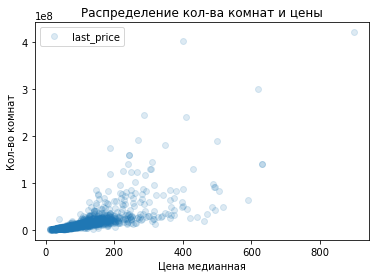

0.6536772347424943

In [64]:
price_total = exception.pivot_table(index='total_area', values='last_price', aggfunc=['median', 'mean', 'count'])
price_total.plot(y='median', style='o', alpha=0.15)
plt.xlabel('Цена медианная')
plt.ylabel('Кол-во комнат')
plt.title('Распределение кол-ва комнат и цены')
plt.show()

exception['total_area'].corr(exception['last_price'])

    Кореляция показывает не значительное увеличение цены в зависимости от площади, что собственно видно и на графике - большая часть квартир расположена от 0 до 200 и видно незначительное увеличение цены.

5.2.2 зависит ли цена от  числа комнат

,median,mean,count
rooms,,,
0,2.969448e+06,2700000,169
1,3.850469e+06,3600000,7294
2,5.640398e+06,4800000,7218
3,8.266021e+06,6200000,5354
4,1.354449e+07,9200000,1110
5,2.389061e+07,13950000,306
6,3.238787e+07,19000000,98
7,5.254797e+07,25000000,57
8,5.158091e+07,22190000,11


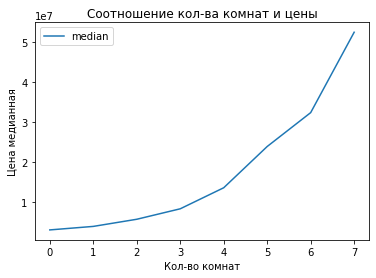

0.3636751812950989

In [65]:
price_rooms=exception.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median','count'])
price_rooms.columns=['median','mean','count']
display(price_rooms)
price_rooms.query('count > 50').plot(y='median')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена медианная')
plt.title('Соотношение кол-ва комнат и цены')
plt.show()
exception['last_price'].corr(exception['rooms'])

Рост цен за квартиру видно при увелеичении числа комнат, незначительное увеличение идет от однушек до двушек и постепенное дальнейшее увеличение.

зависит ли цена от  удалённости от центра

In [68]:
price_km = exception.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['median', 'mean','count'])
display(price_km)

,median,mean,count
,last_price,last_price,last_price
cityCenters_nearest,,,
181.0,31099000.0,31099000.0,1
208.0,5800000.0,5800000.0,1
215.0,10990000.0,10990000.0,1
287.0,9590000.0,9590000.0,1
291.0,11500000.0,11500000.0,1
...,...,...,...
64857.0,3650000.0,3650000.0,1
65105.0,3300000.0,3300000.0,1


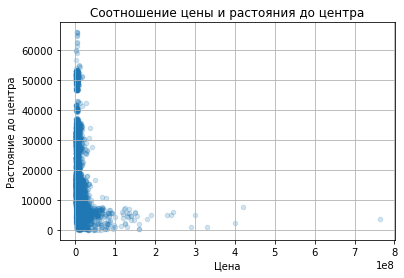

-0.20542050599263176

In [69]:
exception.plot(x='last_price',y='cityCenters_nearest', kind='scatter', grid=True, alpha=0.2)
plt.xlabel('Цена')
plt.ylabel('Растояние до центра')
plt.title('Соотношение цены и растояния до центра')
plt.show()

exception['cityCenters_nearest'].corr(exception['last_price'])

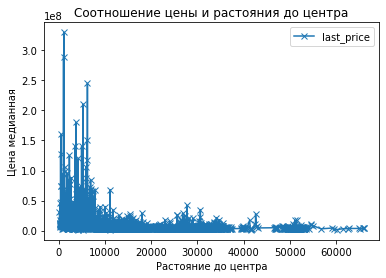

In [70]:
price_km.plot(y='median', style='x-')
plt.ylabel('Цена медианная')
plt.xlabel('Растояние до центра')
plt.title('Соотношение цены и растояния до центра')
plt.show()


Коррелия показывает отрицательное значение что собственноо и верно при увеличение растояния от центра гоорода цена за квартиру уменьшается, самые высокие цены расположены в центре города и до 10000 м и дальше есть подъем незначительный 30 км.

зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

In [72]:
price_floor = exception.pivot_table(index='floor_category', values='last_price', aggfunc=['median','mean','count'])
display(price_floor)

,median,mean,count
,last_price,last_price,last_price
floor_category,,,
1-й этаж,3950000,4.883536e+06,2665
Другой,4899000,6.747088e+06,15916
Последний этаж,4400000,7.603382e+06,3054


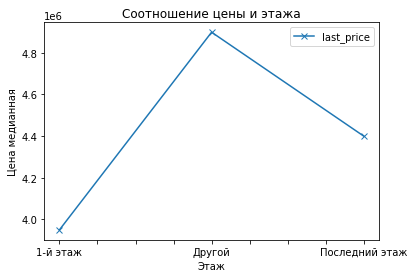

In [73]:
price_floor.plot(y='median', style='x-')
plt.ylabel('Цена медианная')
plt.xlabel('Этаж')
plt.title('Соотношение цены и этажа')
plt.show()

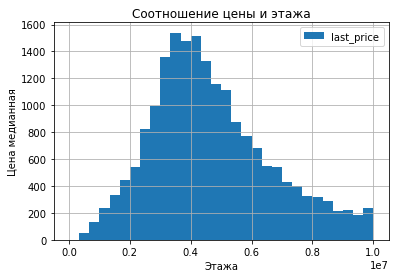

In [74]:
exception.plot(x='floor_category',y='last_price', kind='hist',bins=30, grid=True,range=(0,10000000))
plt.ylabel('Цена медианная')
plt.xlabel('Этажа')
plt.title('Соотношение цены и этажа')
plt.show()

График показывает что покупали в сновном кваартир от 1 до последнего этажей, меньше всего спроса на 1е этажи, показатели как раз 1го и последнего и скосили кореляцию до минималок.0.027

Также изучите зависимость от даты размещения: дня недели, месяца и года.

Зависимость цены от дня недели и цены.

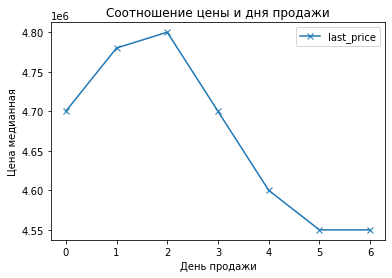

In [75]:
day_price = exception.pivot_table(index='weekday', values='last_price', aggfunc=['median', 'mean','count'])
day_price.plot(y='median', style='x-')
plt.ylabel('Цена медианная')
plt.xlabel('День недели')
plt.title('Соотношение цены и дня продажи')
plt.show()


,median,mean,count
,last_price,last_price,last_price
weekday,,,
0,4700000,6.651934e+06,3317
1,4780000,6.489315e+06,3827
2,4800000,6.759784e+06,3620
3,4700000,6.788566e+06,3943
4,4600000,6.444783e+06,3677
5,4550000,7.031044e+06,1743
6,4550000,6.321364e+06,1508


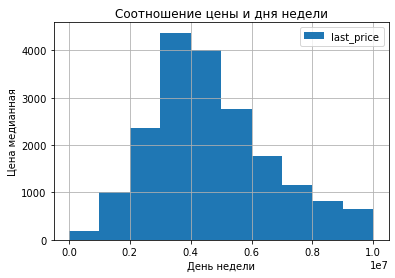

In [76]:
display(day_price)

exception.plot(x='weekday',y='last_price', kind='hist', grid=True,bins=10, range=(0,10000000))
plt.ylabel('Цена медианная')
plt.xlabel('День недели')
plt.title('Соотношение цены и дня недели')
plt.show()

Месяц

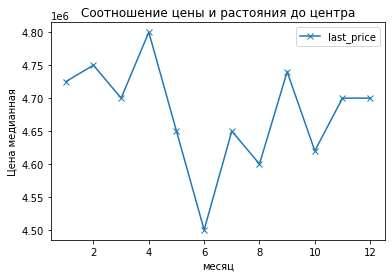

In [77]:
monat_price = exception.pivot_table(index='monat', values='last_price', aggfunc=['median','mean','count'])
monat_price.plot(y='median', style='x-')

plt.ylabel('Цена медианная')
plt.xlabel('месяц')
plt.title('Соотношение цены и растояния до центра')
plt.show()

,median,mean,count
,last_price,last_price,last_price
monat,,,
1,4725000,6.922767e+06,1334
2,4750000,6.653356e+06,2373
3,4700000,6.404179e+06,2389
4,4800000,6.786745e+06,2261
5,4650000,6.721121e+06,1171
6,4500000,6.464223e+06,1594
7,4650000,6.730462e+06,1511
8,4600000,6.497586e+06,1589


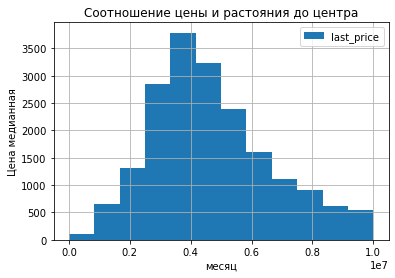

In [78]:
display(monat_price)

exception.plot(x='monat',y='last_price', kind='hist', grid=True,bins=12, range=(0,10000000))
plt.ylabel('Цена медианная')
plt.xlabel('месяц')
plt.title('Соотношение цены и растояния до центра')
plt.show()

Год

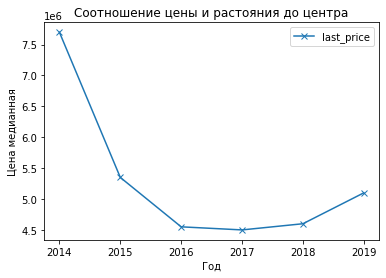

In [80]:
year_price = exception.pivot_table(index='year', values='last_price', aggfunc=['median', 'mean', 'count'])
year_price.plot(y='median', style='x-')
plt.ylabel('Цена медианная')
plt.xlabel('Год')
plt.title('Соотношение цены и года')
plt.show()

,median,mean,count
,last_price,last_price,last_price
year,,,
2014,7700000,1.208714e+07,137
2015,5350000,8.572833e+06,1191
2016,4550000,6.880854e+06,2651
2017,4500000,6.629887e+06,7482
2018,4600000,6.075401e+06,7449
2019,5100000,6.845580e+06,2725


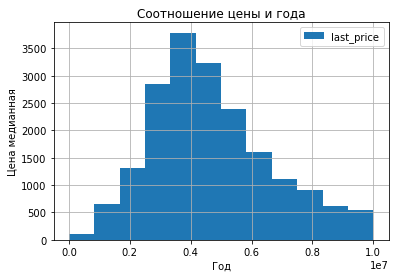

In [81]:
display(year_price)
exception.plot(x='year',y='last_price', kind='hist', grid=True,bins=12, range=(0,10000000))
plt.ylabel('Цена медианная')
plt.xlabel('Год')
plt.title('Соотношение цены и года')
plt.show()

Покупали квартиры чаще всего с понедельника по среду дальше частота покупок падает, по месяцам идет резкий рост с января по апрель потом резкий спад до июня и снова небольшие подъемы чрез месяц, а вот с годами виден постепенный спад от 2014 до 16 и небольшой подъем в 2018 году.

    5.3Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья

    5.3.1 Cредняя цена за квадратны метр по первой десятке

In [82]:
price_SPB = data.query('locality_name == "Санкт-Петербург"')['price'].mean()
print(f'Средняя цена за квадратный метр в Санкт-Петербурге - {price_SPB} рублей за кв. метр')

price_MP = data.query('locality_name == "поселок Мурино"')['price'].mean()
print(f'Средняя цена за квадратный метр в Мурино - {price_MP} рублей за кв. метр')

price_SH = data.query('locality_name == "поселок Шушары"')['price'].mean()
print(f'Средняя цена за квадратный метр в Шушарах - {price_SH} рублей за кв. метр')

price_BB = data.query('locality_name == "Всеволожск"')['price'].mean()
print(f'Средняя цена за квадратный метр в Всеволожске - {price_BB} рублей за кв. метр')

price_PN = data.query('locality_name == "Пушкин"')['price'].mean()
print(f'Средняя цена за квадратный метр в Пушкино - {price_PN} рублей за кв. метр')

price_KL = data.query('locality_name == "Колпино"')['price'].mean()
print(f'Средняя цена за квадратный метр в Колпино - {price_KL} рублей за кв. метр')

price_PG = data.query('locality_name == "посёлок Парголово"')['price'].mean()
print(f'Средняя цена за квадратный метр в Парголово - {price_PG} рублей за кв. метр')

price_GT = data.query('locality_name == "Гатчина"')['price'].mean()
print(f'Средняя цена за квадратный метр в Гатчина - {price_GT} рублей за кв. метр')

price_KD = data.query('locality_name == "деревня Кудрово"')['price'].mean()
print(f'Средняя цена за квадратный метр в Кудрово - {price_KD} рублей за кв. метр')

price_VB = data.query('locality_name == "Выборг"')['price'].mean()
print(f'Средняя цена за квадратный метр в Выборг - {price_VB} рублей за кв. метр')

Средняя цена за квадратный метр в Санкт-Петербурге - 114785.19067851383 рублей за кв. метр
Средняя цена за квадратный метр в Мурино - 86087.51204970542 рублей за кв. метр
Средняя цена за квадратный метр в Шушарах - 78677.36421675135 рублей за кв. метр
Средняя цена за квадратный метр в Всеволожске - 68654.47398603165 рублей за кв. метр
Средняя цена за квадратный метр в Пушкино - 103125.8192907219 рублей за кв. метр
Средняя цена за квадратный метр в Колпино - 75424.57909803944 рублей за кв. метр
Средняя цена за квадратный метр в Парголово - 90175.91345801107 рублей за кв. метр
Средняя цена за квадратный метр в Гатчина - 68746.14676333923 рублей за кв. метр
Средняя цена за квадратный метр в Кудрово - 92473.54757579978 рублей за кв. метр
Средняя цена за квадратный метр в Выборг - 58141.909153318615 рублей за кв. метр


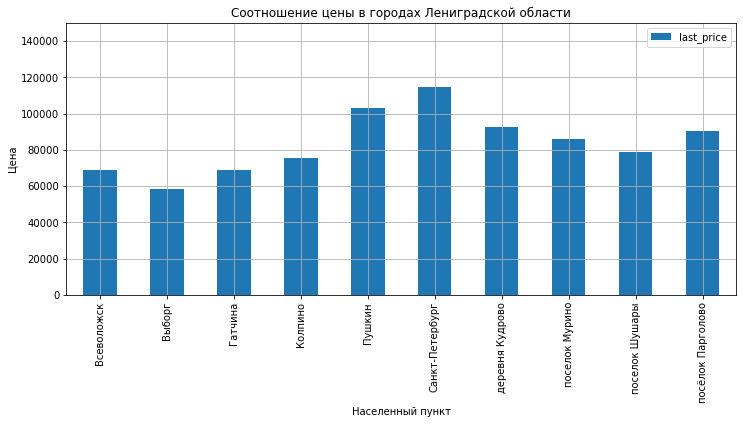

In [84]:
price_sr={'Санкт-Петербург':price_SPB,
         'поселок Мурино': price_MP,
         'поселок Шушары': price_SH,
         'Всеволожск': price_BB,
         'Пушкин':price_PN,
         'Колпино': price_KL,
          'посёлок Парголово':price_PG ,
          'Гатчина':price_GT ,
          'деревня Кудрово': price_KD,
          'Выборг': price_VB}
price= pd.DataFrame(list(price_sr.items()),
                   columns=['locality_name', 'last_price'])
price.sort_values('locality_name', ascending=True).plot(x='locality_name', y='last_price', ylim=(0,150000),xlim=(-1,11),kind='bar', grid=True,figsize=(12,5) )
plt.ylabel('Цена')
plt.xlabel('Населенный пункт')
plt.title('Соотношение цены в городах Лениградской области')
plt.show()

    5.3.2 Самая низкая цена по населенным пунктам

In [85]:
city_price = exception[['price', 'locality_name']]
display(city_price.min())


price              111.834862
locality_name    Бокситогорск
dtype: object

    5.3.3 Самая высокая цена по населенным пунктам

In [86]:
display(city_price.max())

price            1907500.0
locality_name     село Шум
dtype: object

    5.4 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге

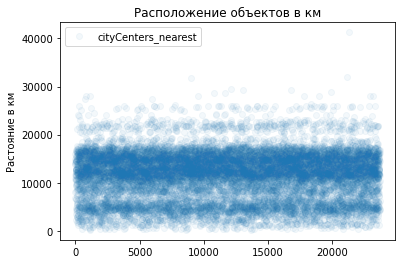

In [87]:

km_centr = exception[['locality_name','cityCenters_nearest']]
SPB = km_centr.query('locality_name=="Санкт-Петербург"')
SPB.plot(style='o', alpha=0.05)
plt.ylabel('Растояние в км')
plt.title('Расположение объектов в км')
plt.show()


По скоплению видно что распределние проданных квартир по Санкт Петербургу входит в радиус примерно до 16 км, это и будет примерный радиус поиска квартир расположенных в центре города.

    5.5 Растояние до центра в км и добавление столбца

In [89]:
km_centr = exception[['locality_name','cityCenters_nearest']]

km_centr['cityCenters_nearest_km']=km_centr['cityCenters_nearest'].copy()
km_centr['cityCenters_nearest_km']=km_centr['cityCenters_nearest_km']/1000


display(km_centr)

C:\Users\User\AppData\Local\Temp\ipykernel_1100\713732877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  km_centr['cityCenters_nearest_km']=km_centr['cityCenters_nearest'].copy()
C:\Users\User\AppData\Local\Temp\ipykernel_1100\713732877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  km_centr['cityCenters_nearest_km']=km_centr['cityCenters_nearest_km']/1000


,locality_name,cityCenters_nearest,cityCenters_nearest_km
0,Санкт-Петербург,16028.0,16.028
1,поселок Шушары,18603.0,18.603
2,Санкт-Петербург,13933.0,13.933
3,Санкт-Петербург,6800.0,6.800
4,Санкт-Петербург,8098.0,8.098
...,...,...,...
23693,Петергоф,34104.0,34.104
23694,Санкт-Петербург,4232.0,4.232
23696,село Рождествено,NaN,NaN
23697,Санкт-Петербург,10364.0,10.364


In [90]:
km_centr=km_centr.query('cityCenters_nearest_km<=16 and locality_name=="Санкт-Петербург"')
km_centr = km_centr.drop(columns=['cityCenters_nearest']) 

Столбец со средней ценой

In [91]:
km_centr['price']=exception['price']
km_centr['cityCenters_nearest_km']=km_centr['cityCenters_nearest_km'].round()
display(km_centr)


,locality_name,cityCenters_nearest_km,price
2,Санкт-Петербург,14.0,92785.714286
3,Санкт-Петербург,7.0,408176.100629
4,Санкт-Петербург,8.0,100000.000000
7,Санкт-Петербург,12.0,110544.692737
9,Санкт-Петербург,15.0,88524.590164
...,...,...,...
23688,Санкт-Петербург,14.0,91089.108911
23690,Санкт-Петербург,6.0,105769.230769
23691,Санкт-Петербург,4.0,129903.978052
23694,Санкт-Петербург,4.0,72490.845228


In [92]:
km_centr['fur_ein_km']=km_centr['price']/km_centr['cityCenters_nearest_km']

display(km_centr.reset_index().head())

,index,locality_name,cityCenters_nearest_km,price,fur_ein_km
0,2,Санкт-Петербург,14.0,92785.714286,6627.551020
1,3,Санкт-Петербург,7.0,408176.100629,58310.871518
2,4,Санкт-Петербург,8.0,100000.000000,12500.000000
3,7,Санкт-Петербург,12.0,110544.692737,9212.057728
4,9,Санкт-Петербург,15.0,88524.590164,5901.639344


    5.5.1 График зависимости цены по км от удаленности и нахождение центра города в зависимости от цены

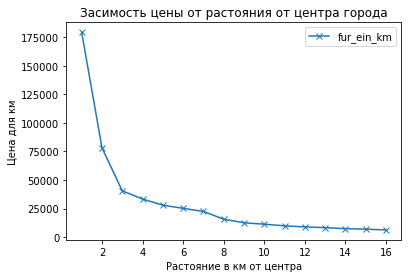

In [93]:
ein_km = km_centr.pivot_table(index='cityCenters_nearest_km', values='fur_ein_km', aggfunc=['mean'])
ein_km.plot(y='mean', style='x-')
plt.ylabel('Цена для км')
plt.xlabel('Растояние в км от центра')
plt.title('Засимость цены от растояния от центра города')
plt.show()


Здесь видно изменение в цене за квадратный метр и на растоянии в 8 км и происходит изменение графика что подсказывает что радиус поиска квартир в центр города найдет.

In [94]:
display(ein_km)

,mean
,fur_ein_km
cityCenters_nearest_km,
1.0,179314.345809
2.0,78251.862254
3.0,40520.287524
4.0,33364.624004
5.0,27949.545357
6.0,25176.163068
7.0,22455.558172
8.0,15716.469801


    5.6 до 8 км это центр

In [95]:
km_centr12=km_centr.query('0<=cityCenters_nearest_km<=8')
display(km_centr12)

,locality_name,cityCenters_nearest_km,price,fur_ein_km
3,Санкт-Петербург,7.0,408176.100629,58310.871518
4,Санкт-Петербург,8.0,100000.000000,12500.000000
24,Санкт-Петербург,2.0,66872.427984,33436.213992
35,Санкт-Петербург,4.0,104026.845638,26006.711409
51,Санкт-Петербург,7.0,279503.105590,39929.015084
...,...,...,...,...
23665,Санкт-Петербург,5.0,90425.531915,18085.106383
23681,Санкт-Петербург,7.0,122093.023256,17441.860465
23690,Санкт-Петербург,6.0,105769.230769,17628.205128
23691,Санкт-Петербург,4.0,129903.978052,32475.994513


    5.6.1 Добавление недостоющих столбцов. Для проведения необходимого анализа объедением две таблицы.

In [96]:
km_centr12 = km_centr12.merge(exception[['floor','ceiling_height','rooms', 'total_area','price', 'weekday', 'monat','year','floor_category']])
display(km_centr12)

,locality_name,cityCenters_nearest_km,price,fur_ein_km,floor,ceiling_height,rooms,total_area,weekday,monat,year,floor_category
0,Санкт-Петербург,7.0,408176.100629,58310.871518,9,2.771484,3,159.00,4,7,2015,Другой
1,Санкт-Петербург,8.0,100000.000000,12500.000000,13,3.029297,2,100.00,1,6,2018,Другой
2,Санкт-Петербург,8.0,100000.000000,12500.000000,3,2.500000,1,32.00,3,2,2018,Другой
3,Санкт-Петербург,8.0,100000.000000,12500.000000,6,2.650391,2,53.00,3,6,2018,Другой
4,Санкт-Петербург,8.0,100000.000000,12500.000000,2,2.800781,1,32.00,0,9,2018,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...
21324,Санкт-Петербург,6.0,105769.230769,17628.205128,8,2.500000,1,31.20,0,4,2019,Другой
21325,Санкт-Петербург,6.0,105769.230769,17628.205128,3,2.650391,2,52.00,0,10,2018,Другой
21326,Санкт-Петербург,6.0,105769.230769,17628.205128,2,2.771484,2,52.00,3,7,2018,Другой
21327,Санкт-Петербург,4.0,129903.978052,32475.994513,7,2.750000,2,72.90,3,10,2016,Другой


    5.6.2 Распределение квартир по площади в центре города.

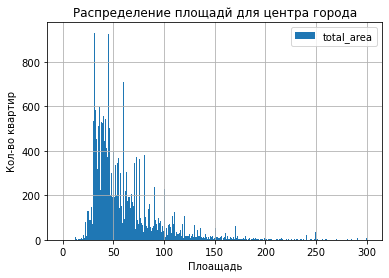

In [98]:
km_centr12.plot(y='total_area', kind='hist', bins=300,grid=True, range=(0,300))
plt.ylabel('Кол-во квартир')
plt.xlabel('Плоащадь')
plt.title('Распределение площадй для центра города')
plt.show()

    5.6.3 Распределение квартир по цене за квадратный метр в центре города.

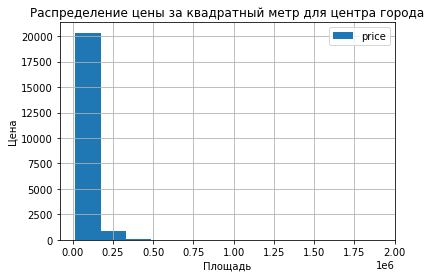

In [99]:
km_centr12.plot(y='price', kind='hist', bins=12, grid=True)
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.title('Распределение цены за квадратный метр для центра города')
plt.show()

    5.6.4 Распределение квартир по количество комнат в центре города.

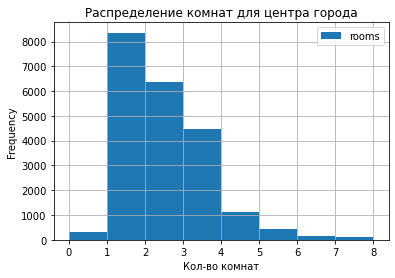

In [100]:
km_centr12.plot(y='rooms', kind='hist', bins=8,grid=True, range=(0,8))

plt.xlabel('Кол-во комнат')
plt.title('Распределение комнат для центра города')
plt.show()

    5.6.5 Распределение квартир по высота потолков в центре города.

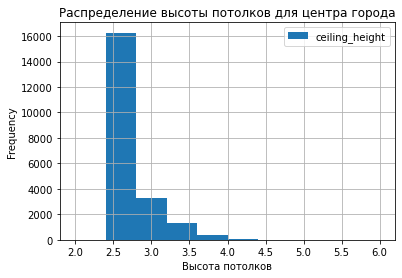

In [101]:
km_centr12.plot(y='ceiling_height', kind='hist', bins=10,grid=True, range=(2,6))

plt.xlabel('Высота потолков')
plt.title('Распределение высоты потолков для центра города')
plt.show()

    5.6.6 Отношение цены и колчиства комант

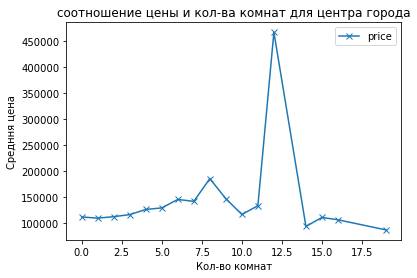

In [102]:
price_rooms = km_centr12.pivot_table(index='rooms', values='price', aggfunc=['mean','median'])
price_rooms.plot(y='mean', style='x-')
plt.xlabel('Кол-во комнат')
plt.ylabel('Средння цена')
plt.title('соотношение цены и кол-ва комнат для центра города')
plt.show()

In [103]:
display(price_rooms)

,mean,median
,price,price
rooms,,
0,111039.252120,103224.137931
1,108767.171309,100000.000000
2,111581.684111,100000.000000
3,115558.701813,100000.000000
4,125459.973288,100000.000000
5,128491.714043,100000.000000
6,144758.941093,125000.000000
7,141074.585274,100000.000000


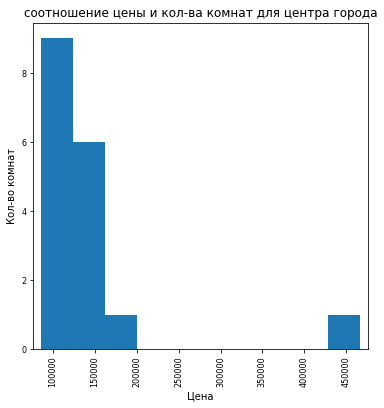

In [104]:
km_centr124 = km_centr12.pivot_table(index='rooms', values=['locality_name','price']) 
pd.plotting.scatter_matrix(km_centr124, figsize=(6,6))
plt.xlabel('Цена')
plt.ylabel('Кол-во комнат')
plt.title('соотношение цены и кол-ва комнат для центра города')
plt.show()

    5.6.7 Отношение цены и этажа в центре города.

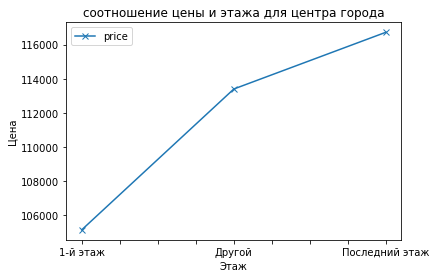

,mean,median
,price,price
floor_category,,
1-й этаж,105135.683994,100000.0
Другой,113393.470461,100000.0
Последний этаж,116720.822682,100000.0


In [105]:
price_floor = km_centr12.pivot_table(index='floor_category', values='price', aggfunc=['mean','median'])
price_floor.plot(y='mean', style='x-')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('соотношение цены и этажа для центра города')
plt.show()
display(price_floor)

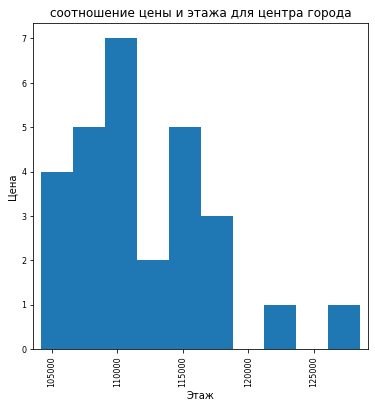

In [106]:
km_centr123 = km_centr12.pivot_table(index='floor', values=['locality_name','price']) 
pd.plotting.scatter_matrix(km_centr123, figsize=(6,6))
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('соотношение цены и этажа для центра города')
plt.show()

5.6.7 Удлаеностть от цента и цена

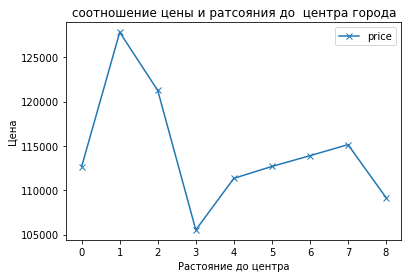

,mean,median
,price,price
cityCenters_nearest_km,,
0.0,112666.936069,100000.000000
1.0,127813.309523,100549.450549
2.0,121243.876468,100000.000000
3.0,105519.226724,100000.000000
4.0,111338.583945,100000.000000
5.0,112676.457517,100000.000000
6.0,113890.331798,100000.000000
7.0,115137.497496,100000.000000


-0.035685911221831325

In [107]:
price_km = km_centr12.pivot_table(index='cityCenters_nearest_km', values='price', aggfunc=['mean','median'])
price_km.plot(y='mean', style='x-')
plt.xlabel('Растояние до центра')
plt.ylabel('Цена')
plt.title('соотношение цены и ратсояния до  центра города')
plt.show()
display(price_km)
km_centr12['price'].corr(km_centr12['cityCenters_nearest_km'])

    5.6.8.1 Отношение даты размещения(день) и цена

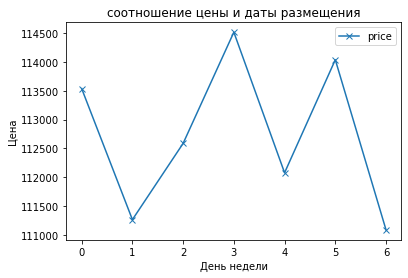

,mean,median
,price,price
weekday,,
0,113536.825836,100000.0
1,111268.286835,100000.0
2,112588.069415,100000.0
3,114512.316823,100000.0
4,112079.533385,100000.0
5,114035.687422,100000.0
6,111090.916550,100000.0


In [108]:
price_day = km_centr12.pivot_table(index='weekday', values='price', aggfunc=['mean','median'])
price_day.plot(y='mean', style='x-')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('соотношение цены и даты размещения')
plt.show()
display(price_day)


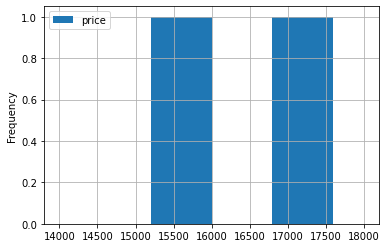

In [109]:
km_centr12.plot(x='weekday',y='price', kind='hist',bins=10, grid=True,range=(14000,18000))
plt.show()

    5.6.8.2 Отношение даты размещения(месяц) и цена

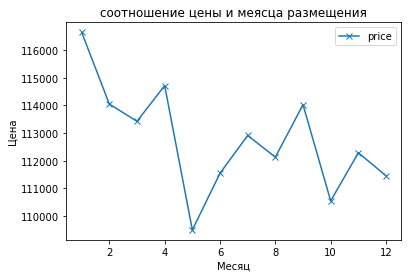

,mean,median
,price,price
monat,,
1,116642.058564,100000.0
2,114047.439942,100000.0
3,113425.792751,100000.0
4,114715.130279,100000.0
5,109503.412450,100000.0
6,111549.637722,100000.0
7,112913.356291,100000.0
8,112131.377746,100000.0


In [110]:
price_m = km_centr12.pivot_table(index='monat', values='price', aggfunc=['mean','median'])
price_m.plot(y='mean', style='x-')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('соотношение цены и меясца размещения')
plt.show()
display(price_m)



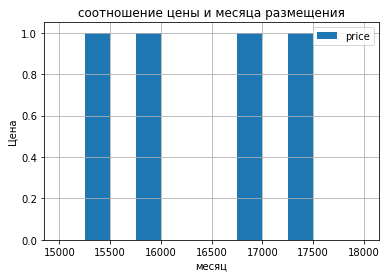

In [111]:
km_centr12.plot(x='monat',y='price', kind='hist',bins=12, grid=True,range=(15000,18000))
plt.xlabel('месяц')
plt.ylabel('Цена')
plt.title('соотношение цены и месяца размещения')
plt.show()

    5.6.8.3 Отношение даты размещения(год) и цена

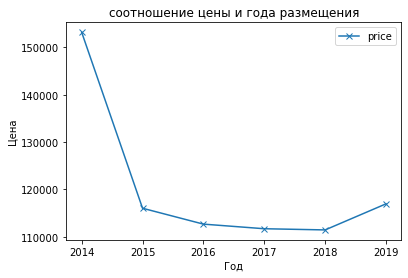

,mean,median
,price,price
year,,
2014,153203.262504,134200.0
2015,116027.016114,100000.0
2016,112673.317051,100000.0
2017,111699.524355,100000.0
2018,111449.797841,100000.0
2019,116958.772643,100000.0


In [112]:
price_y = km_centr12.pivot_table(index='year', values='price', aggfunc=['mean','median'])
price_y.plot(y='mean', style='x-')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('соотношение цены и года размещения')
plt.show()
display(price_y)


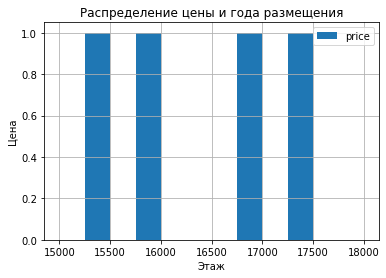

In [113]:
km_centr12.plot(x='year',y='price', kind='hist',bins=12, grid=True,range=(15000,18000))
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Распределение цены и года размещения')
plt.show()

5.6 - Вывод - Выделил сегмент квартир по центру Санкт -Петрбурга, он аходится в радиусе 3 км отметки, на графике видно резкое изменение предложения квартир что и является иском точкой радиуса нахождения квартир для центра. Показатели зависимости цены от количества комнат - рост идет до 5и комнат и потом незначительный спад до 8 и следом рост до 10, по этажности - виден рост по нахожднию квартиры - с первого по последний самы большой показатель на последних этажах и незначительный - 1й этаж, по удалености от центра - в радиусе 1 км самый болшой показатель дальше идет спад, по дням покупки - покупали часто в среду и чуть меньше в понедельник в остальные дни показатель не высокий, по месяцам видно что спрос был самы высокий в апреле месяце после чего резкий спад  до мая и постепенный рост с проседанием в ноябре и августе, что касается годов то график похож на общий по городам и самый высокий спрос в 2014 году и далее резкий спад до 15 года и незначительное повышение 2019 года.  

Сранивть с общими выводами

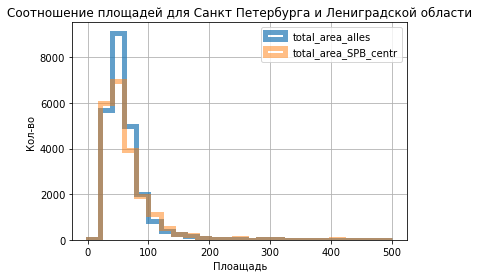

In [114]:
ax = median_data = data.plot(kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='total_area_alles')
exp_medain = km_centr12.plot(kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.5,
    label='total_area_SPB_centr',
    ax=ax,
    grid=True,
    legend=True,)
plt.xlabel('Плоащадь')
plt.ylabel('Кол-во')
plt.title('Соотношение площадей для Санкт Петербурга и Лениградской области')
plt.show()

При сравнений графиков от плоащадей по центру Санкт -Петербурга и общей представленной площади видно что по пропорциям графики похожи с разницой лишь в количестве представленных квартир, больше всего квартир в сегменте до 50 кв. м т и дальше идет постепенный спадпримерно до 100 кв. м.

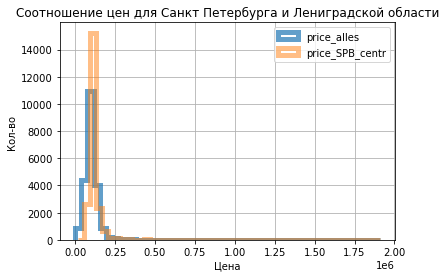

In [115]:
bx = median_data = exception.plot(kind='hist',
    y='price',
    histtype='step',
    
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='price_alles')
exp_medain = km_centr12.plot(kind='hist',
    y='price',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.5,
    label='price_SPB_centr',
    ax=bx,
    grid=True,
    legend=True)
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.title('Соотношение цен для Санкт Петербурга и Лениградской области')
plt.show()

По ценне разброс примерно пропорциональный с той же разницей что и при сравнение площадей, здесь больше всего квартир за квадратный метр от 2500 и до 15000 по центру Санкт -Петерберга и по остальным городам самый большой показатель от 2200 до 11000. 

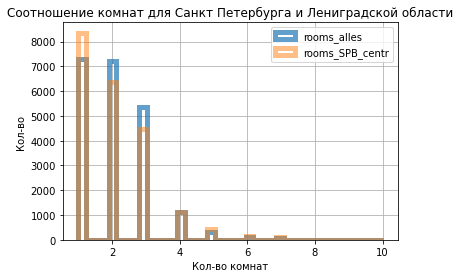

In [116]:
cx = median_data = exception.plot(kind='hist',
    y='rooms',
    histtype='step',
    bins=40,
    range=(1,10),
    linewidth=5,
    alpha=0.7,
    label='rooms_alles')
exp_medain = km_centr12.plot(kind='hist',
    y='rooms',
    histtype='step',
    bins=40,
    range=(1,10),                        
    linewidth=5,
    alpha=0.5,
    label='rooms_SPB_centr',
    ax=cx,
    grid=True,
    legend=True)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во')
plt.title('Соотношение комнат для Санкт Петербурга и Лениградской области')
plt.show()

Пропорции сохраняются и по количеству комнат, для Центра Санкт-Петербурга однушки и двушки имеют самые высокие показатели 9000 и 6500 соответственно когда для всех городов почти 7200 однушки и 6300 двушки далее спрос снижается с увеличением комнат.

## Общий вывод

Общий вывод - 
 1.В предобработке данных были обнаруженны пропущенные занчения в столбцах часть которых я заменил на логичные, как мне кажется, значения,locality_name - Санкт_петербург, balcony/is_apartment - 0/False,ceiling_height-среднее значение и тд..Что касается поиска дубликатов - в названии населенных пунктов была допущена опечатка вместо 'Е' писали 'Ё' и наоборот, после замены неявные дубликаты исчезли.Оставшиеся столбцы living_area kitchen_area airports_nearest cityCenters_nearest days_exposition пропуски оставлю как есть, так как на 0 не поменяешь.Пропуски airports_nearest, parks_nearest, ponds_nearest, parks_around3000,ponds_around3000 оставил без изменения.
 2. При иследовательсоком анализе были обнаружены выбивающиеся значения точнее по дням 7, 30, 45, 90 и 60, данны мне показались подозрительными и я их удалил. Искажения в данных сильной увеличили среднее занчение по отношению к мединном 180 и 95 соответсвенно, после удаления искажающих значений разница усеньшилась и график распределения по дням псоле прадажи квартиры стал более плавным и больше похож на график нормального распределения.
 3.От данных редких и выбивающихся значений избавился и отсортированные данные вот что показали - 
 - Коррелия (0.65) показывает   увеличение цены в зависимости от площади,  большая часть квартир расположена от 0 до 200 метров и видно незначительное увеличение цены.
  - Рост цен за квартиру видно при увелеичении числа комнат, незначительное увеличение идет от однушек до двушек и постепенное дальнейшее увеличение. Коррелия - 0.36
  - при увеличение растояния от центра гоорода цена за квартиру уменьшается, самые высокие цены расположены в центре города и до 10000 м и дальше есть подъем незначительный 30 км, Коррелия  -  -0.208
  - покупали в сновном кваартир от 1 до последнего этажей, меньше всего спроса на 1е этажи, показатели как раз 1го и последнего и скосили кореляцию до минималок.0.027
  - Покупали квартиры чаще всего с понедельника по среду дальше частота покупок падает, по месяцам идет резкий рост с января по апрель потом резкий спад до июня и снова небольшие подъемы чрез месяц, а вот с годами виден постепенный спад от 2014 до 16 и небольшой подъем в 2018 году.
  4 Ниже приведены 10 городов с самой дорогой ценой за квадратный метр -
      Средняя цена за квадратный метр в Санкт-Петербурге - 114785.19067851409 рублей за кв. метр
Средняя цена за квадратный метр в Мурино - 86087.51204970534 рублей за кв. метр
Средняя цена за квадратный метр в Шушарах - 78677.3642167513 рублей за кв. метр
Средняя цена за квадратный метр в Всеволожске - 68654.4739860316 рублей за кв. метр
Средняя цена за квадратный метр в Пушкино - 103125.81929072196 рублей за кв. метр
Средняя цена за квадратный метр в Колпино - 75424.57909803945 рублей за кв. метр
Средняя цена за квадратный метр в Парголово - 90175.91345801107 рублей за кв. метр
Средняя цена за квадратный метр в Гатчина - 68746.14676333922 рублей за кв. метр
Средняя цена за квадратный метр в Кудрово - 92473.54757579972 рублей за кв. метр
Средняя цена за квадратный метр в Выборг - 58141.90915331862 рублей за кв. метр
    5. Выделен сегмент квартир в центре Санкт-Петербурга, он составил радиус в 3 км, на графике видно изменения колчиства квартир в радиусе 3 км, и является искомой  величиной охвата центра города.
    Показатели зависимости цены от количества комнат - рост идет до 5и комнат и потом незначительный спад до 8 и следом рост до 10, по этажности - виден рост по нахожднию квартиры - с первого по последний самы большой показатель на последних этажах и незначительный - 1й этаж, по удалености от центра - в радиусе 1 км самый болшой показатель дальше идет спад, по дням покупки - покупали часто в среду и чуть меньше в понедельник в остальные дни показатель не высокий, по месяцам видно что спрос был самы высокий в апреле месяце после чего резкий спад  до мая и постепенный рост с проседанием в ноябре и августе, что касается годов то график похож на общий по городам и самый высокий спрос в 2014 году и далее резкий спад до 15 года и незначительное повышение 2019 года. 
    -При сравнений графиков от плоащадей по центру Санкт -Петербурга и общей представленной площади видно что по пропорциям графики похожи с разницой лишь в количестве представленных квартир, больше всего квартир в сегменте до 50 кв. м т и дальше идет постепенный спадпримерно до 100 кв. м.
    -По ценне разброс примерно пропорциональный с той же разницей что и при сравнение площадей, здесь больше всего квартир за квадратный метр от 1000 и до 3400 по центру Санкт -Петерберга и по остальным городам самый большой показатель от 1000 до 11000.
    -Пропорции сохраняются и по количеству комнат, для Центра Санкт-Петербурга однушки и двушки имеют самые высокие показатели 2000 и 1000 соответственно когда для всех городов почти 8000 однушки и 7500 двушки далее спрос снижается с увеличением комнат.
    -В общем если сравнивать все представленные параметры то центр Санкт -Петербурга и Санкт-Петербург с общим количеством по остльным городам Ленинградсокй области то пропорции сохраняются что в ценовом диапозоне  что при выборе удаленност от центра города, с разницей в том что в центе Санкт-Петербурга больший показатель имеют квартиры на последних этажах.